In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import warnings
import random

In [161]:
def split_dataset_to_train_test_validation(df_copy, train_sze, test_sze, validation_sze):
    random.seed(0)
    X = df_copy #Contains all columns
    Y = df_copy[['label']]
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, train_size=0.6, random_state=50)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_temp, Y_temp, train_size=0.5, random_state=50)
    return X_train, Y_train, X_test, Y_test, X_validation, Y_validation

def append_before_column_names(df_copy):
    column_list = ['label']
    row, column = 1,1;
    while row < 29:
        while column < 29:
            column_name = str(row) + 'x' + str(column)
            new_column_name = '_' + column_name
            column_list.append(new_column_name)
            column+=1
        row+=1;
        if(column == 29):
            column = 1
            
    df_copy.columns = column_list
    return df_copy

def new_column_names(df_copy):
    column_list = ['label']
    row, column = 1,1;
    while row < 29:
        while column < 29:
            column_name = str(row) + 'x' + str(column)
            column_list.append(column_name)
            column+=1
        row+=1;
        if(column == 29):
            column = 1
            
    df_copy.columns = column_list
    return df_copy

In [162]:
warnings.filterwarnings('ignore')
df_train = pd.read_csv('MNIST_TRAIN.csv')
df_test = pd.read_csv('MNIST_TEST.csv')

In [163]:
print(df_train.info); print(df_test.info)

<bound method DataFrame.info of        label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       

In [164]:
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

Y_train = df_train[['label']]
Y_test = df_test[['label']]

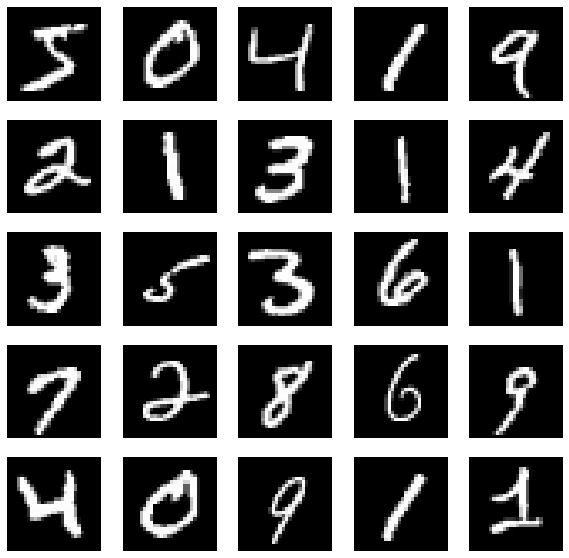

In [165]:
X = np.array(X_train).reshape(df_train.shape[0],28,28,1)
Y = np.array(Y_train).reshape(df_train.shape[0],1)

f, axes = plt.subplots(5, 5, sharey=True,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    ax.imshow(X[i,:,:,0],cmap="gray")

In [166]:
print(X_train.shape); print(Y_train.shape)
print(X_test.shape); print(Y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [167]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [168]:
kneigh = KNeighborsClassifier(n_neighbors=5)
kneigh.fit(X_train,Y_train)

KNeighborsClassifier()

In [169]:
predict_train = kneigh.predict(X_train)
predict_test = kneigh.predict(X_test)

In [170]:
print('Confusion Matrix of Train Set:'); print(confusion_matrix(Y_train, predict_train))
print('Classification Report of Train Set:'); print(classification_report(Y_train, predict_train))

print('------------------------------------------')

print('Confusion Matrix of Test Set:'); print(confusion_matrix(Y_test, predict_test))
print('Classification Report of Test Set:'); print(classification_report(Y_test, predict_test))

Confusion Matrix of Train Set:
[[5893    4    2    0    1    4   14    2    1    2]
 [   1 6721    7    0    0    0    1    9    1    2]
 [  24   36 5821   10    7    4    6   41    6    3]
 [   2   12   26 6001    0   34    2   21   17   16]
 [   3   39    1    1 5724    0    6    5    2   61]
 [  13    5    3   35    5 5301   39    3    3   14]
 [  11    9    0    0    4   12 5882    0    0    0]
 [   1   46   10    2    7    0    0 6165    0   34]
 [  15   59   10   40   20   52   14   11 5590   40]
 [  10    6    5   22   34    9    2   39    7 5815]]
Classification Report of Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.97      1.00      0.98      6742
           2       0.99      0.98      0.98      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.98      0.98      5842
           5       0.98      0.98      0.98      5421
           6       0.99

In [171]:
print('Score of the train set: '); print(kneigh.score(X_train, Y_train))
print('Score of the test set: '); print(kneigh.score(X_test, Y_test))

Score of the train set: 
0.9818833333333333
Score of the test set: 
0.9688


NameError: name 'test_images' is not defined

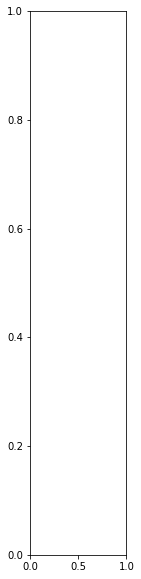

In [172]:
figure = plt.figure(figsize=(10,10)) 
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(test_images[i+50,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(test_images[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")